<a href="https://colab.research.google.com/github/MJMortensonWarwick/ADA2425/blob/main/5_1_PCA_part_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA): Part one
Here we'll perform PCA dimension reduction on some artificial data. It will be a silly example - 2x dimensions down to 1x - but this is to be able to visualise what is happening.

We'll begin with some data creation:

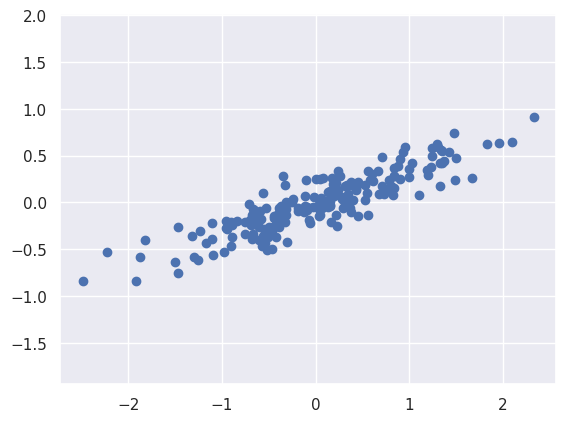

In [2]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

# create and plot some random data in a roughly 90 degrees pattern across two variables
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

This will be another example where actually the main code we care about is simple, but we will have more complex code to visualise. Don't worry about the visualisation bit!

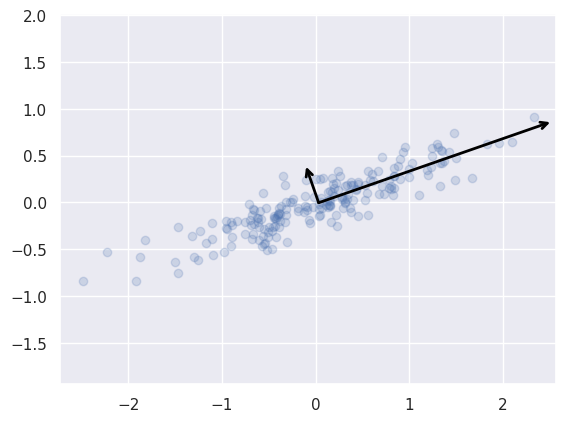

In [3]:
# CARE ABOUT THIS BIT
# fit the PCA with the same number of components (K=2)
pca = PCA(n_components=2)
pca.fit(X) # fit to the data

# DON'T CARE ABOUT THIS BIT
# code to draw the proposed axes (components) suggested by the eiganvectors of the PCA
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

We can see we have effectively overlayed the two new axes on the data, and that they certainly seem to better explain the variance in the data than our original axes. We also can see that the more diaganal of these, the eiganvector with the larger eiganvalue, seemingly explains far more of the variance. We can get the exact values:

In [6]:
exp_var = pca.explained_variance_

for component in exp_var:
  print(f"Component explained variance: {round(component,4)}")
print(f"Total explained variance: {round(sum(exp_var),4)}")

Component explained variance: 0.7625
Component explained variance: 0.0185
Total explained variance: 0.781


As the visual inspection suggested, the first component explains 76% of the variance and second less than 2% (in combination the two share 78% ... i.e. these only about 1 in 5 of the variance is left unaccounted for).

Let's transform the data using these new axes ... effectively we'll rotate the data towards the x (horizontal) and replace the original data with data on our new axis (component).

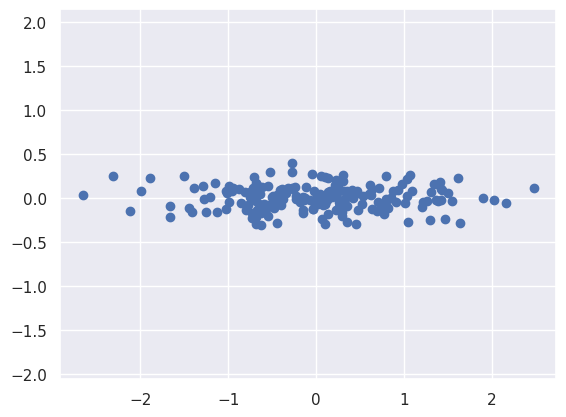

In [7]:
# rotate the data
transformed = pca.fit_transform(X)

# plot
plt.scatter(transformed[:, 0], transformed[:, 1])
plt.axis('equal');

We see the same data (well 78% the same) but rotated to the horizontal. However, we may note that there is a wastefullness to keeping our second component, as it accounts for < 2% of variance. How would it look with just one component?

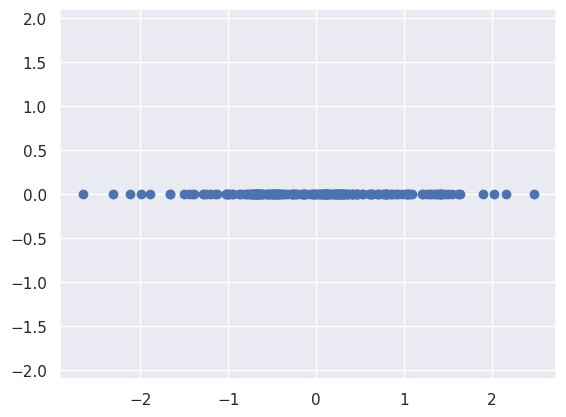

In [8]:
pca = PCA(n_components=1)
transformed_one = pca.fit_transform(X)

# plot again. As there is now no Y axis we'll fill these values with 0
plt.scatter(transformed_one, np.zeros(len(transformed_one)))
plt.axis('equal');

We now have a low dimension representation of our data (moving from 2D to 1D space), but we kept 76% of the original variance!